In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('timeseries.csv', date_parser = True)
data.tail()

,date,open,high,low,close,volume,adjclose
5023,2000-01-07,117.2500,117.9375,110.625,113.5000,11856700,74.764435
5024,2000-01-06,118.0000,118.9375,113.500,114.0000,7971900,75.093842
5025,2000-01-05,112.9375,119.7500,112.125,116.0000,12733200,76.411232
5026,2000-01-04,114.0000,114.5000,110.875,112.0625,8227800,73.817535
5027,2000-01-03,112.4375,116.0000,111.875,116.0000,10347700,76.411232


In [3]:
data_training = data[data['date'] < '2019-01-01'].copy()
data_training

,date,open,high,low,close,volume,adjclose
249,2018-12-31,113.330002,114.349998,112.419998,113.669998,4982800,108.467590
250,2018-12-28,114.220001,114.800003,112.500000,113.029999,5117500,107.856880
251,2018-12-27,109.989998,113.779999,109.470001,113.779999,6045600,108.572556
252,2018-12-26,108.000000,111.389999,105.940002,111.389999,6645800,106.291939
253,2018-12-24,109.900002,111.000000,107.500000,107.570000,3821400,102.646774
254,2018-12-21,112.500000,115.279999,110.440002,110.940002,10386500,105.862541
255,2018-12-20,115.699997,116.449997,111.699997,113.019997,8454400,107.847336
256,2018-12-19,117.150002,120.269997,115.970001,116.430000,6979800,111.101280
257,2018-12-18,116.900002,118.230003,116.019997,116.650002,6290200,111.311211
258,2018-12-17,119.070000,119.779999,115.070000,116.099998,7374500,110.786377


In [4]:
data_test = data[data['date'] >= '2019-01-01'].copy()
data_test

,date,open,high,low,close,volume,adjclose
0,2019-12-26,134.979996,135.309998,134.649994,134.910004,2129700,134.910004
1,2019-12-24,135.610001,135.619995,134.610001,134.979996,1202100,134.979996
2,2019-12-23,135.779999,136.149994,135.000000,135.550003,2803200,135.550003
3,2019-12-20,135.740005,136.419998,134.949997,135.589996,7111800,135.589996
4,2019-12-19,134.460007,134.729996,134.190002,134.559998,3866500,134.559998
5,2019-12-18,134.550003,135.000000,134.149994,134.410004,3101800,134.410004
6,2019-12-17,134.279999,134.690002,133.460007,134.220001,2907200,134.220001
7,2019-12-16,134.940002,135.449997,133.850006,134.130005,3049200,134.130005
8,2019-12-13,134.750000,135.500000,134.009995,134.210007,2535000,134.210007
9,2019-12-12,133.699997,135.660004,133.660004,135.320007,4824100,135.320007


In [5]:
training_data = data_training.drop(['date', 'adjclose'], axis = 1)
training_data.head()

,open,high,low,close,volume
249,113.330002,114.349998,112.419998,113.669998,4982800
250,114.220001,114.800003,112.500000,113.029999,5117500
251,109.989998,113.779999,109.470001,113.779999,6045600
252,108.000000,111.389999,105.940002,111.389999,6645800
253,109.900002,111.000000,107.500000,107.570000,3821400


In [6]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.3650843 , 0.36212312, 0.36440201, 0.36458656, 0.09844001],
       [0.37062153, 0.36494978, 0.36490112, 0.36060473, 0.10179244],
       [0.34430408, 0.35854272, 0.34599789, 0.36527094, 0.12489111],
       ...,
       [0.3626423 , 0.39604273, 0.36256161, 0.37908293, 0.29133296],
       [0.36925277, 0.36306534, 0.35476324, 0.35458532, 0.17920199],
       [0.3595315 , 0.37248745, 0.36100193, 0.37908293, 0.23196233]])

In [7]:
x_train = []
y_train = []

In [8]:
training_data.shape[0]

4779

In [9]:
for i in range(60, training_data.shape[0]):
    x_train.append(training_data[i-60:i])
    y_train.append(training_data[i, 0])

In [10]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train.shape, y_train.shape

((4719, 60, 5), (4719,))

In [12]:
### Building LSTM

In [13]:
from keras import Sequential
from keras.layers import Dense, LSTM, Dropout

Using Theano backend.


In [14]:
regressior = Sequential()

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 5)))
regressior.add(Dropout(0.2))
               
regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 120, activation = 'relu'))
regressior.add(Dropout(0.2))

regressior.add(Dense(units = 1))

In [15]:
regressior.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 60)            15840     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 120)               96480     
__________

In [16]:
regressior.compile(optimizer='sgd', metrics=['accuracy'], loss = 'mean_squared_error')

In [17]:
regressior.fit(x_train, y_train, epochs=100, batch_size=32)

C:\Users\reggl\Anaconda3\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
C:\Users\reggl\Anaconda3\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
C:\Users\reggl\Anaconda3\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not avai

Epoch 1/100
4719/4719 [==============================] - 31s 6ms/step - loss: 0.0770 - acc: 2.1191e-04
Epoch 2/100
4719/4719 [==============================] - 32s 7ms/step - loss: 0.0530 - acc: 2.1191e-04
Epoch 3/100
4719/4719 [==============================] - 32s 7ms/step - loss: 0.0478 - acc: 2.1191e-04
Epoch 4/100
4719/4719 [==============================] - 29s 6ms/step - loss: 0.0395 - acc: 4.2382e-04
Epoch 5/100
4719/4719 [==============================] - 30s 6ms/step - loss: 0.0258 - acc: 4.2382e-04
Epoch 6/100
4719/4719 [==============================] - 29s 6ms/step - loss: 0.0104 - acc: 4.2382e-04
Epoch 7/100
4719/4719 [==============================] - 30s 6ms/step - loss: 0.0045 - acc: 4.2382e-04
Epoch 8/100
4719/4719 [==============================] - 29s 6ms/step - loss: 0.0037 - acc: 4.2382e-04
Epoch 9/100
4719/4719 [==============================] - 29s 6ms/step - loss: 0.0036 - acc: 4.2382e-04
Epoch 10/100
4719/4719 [==============================] - 32s 7ms/step - 

4719/4719 [==============================] - 30s 6ms/step - loss: 0.0028 - acc: 4.2382e-04
Epoch 80/100
4719/4719 [==============================] - 31s 7ms/step - loss: 0.0028 - acc: 4.2382e-04
Epoch 81/100
4719/4719 [==============================] - 31s 7ms/step - loss: 0.0028 - acc: 4.2382e-04
Epoch 82/100
4719/4719 [==============================] - 31s 6ms/step - loss: 0.0028 - acc: 4.2382e-04
Epoch 83/100
4719/4719 [==============================] - 31s 7ms/step - loss: 0.0028 - acc: 4.2382e-04
Epoch 84/100
4719/4719 [==============================] - 31s 7ms/step - loss: 0.0028 - acc: 4.2382e-04
Epoch 85/100
4719/4719 [==============================] - 31s 7ms/step - loss: 0.0027 - acc: 4.2382e-04
Epoch 86/100
4719/4719 [==============================] - 32s 7ms/step - loss: 0.0027 - acc: 4.2382e-04
Epoch 87/100
4719/4719 [==============================] - 31s 7ms/step - loss: 0.0027 - acc: 4.2382e-04
Epoch 88/100
4719/4719 [==============================] - 31s 7ms/step - loss

In [18]:
### Prepare test dataset

In [19]:
data_test.head()

,date,open,high,low,close,volume,adjclose
0,2019-12-26,134.979996,135.309998,134.649994,134.910004,2129700,134.910004
1,2019-12-24,135.610001,135.619995,134.610001,134.979996,1202100,134.979996
2,2019-12-23,135.779999,136.149994,135.000000,135.550003,2803200,135.550003
3,2019-12-20,135.740005,136.419998,134.949997,135.589996,7111800,135.589996
4,2019-12-19,134.460007,134.729996,134.190002,134.559998,3866500,134.559998


In [20]:
data_training.tail(60)

,date,open,high,low,close,volume,adjclose
4968,2000-03-28,125.7500,127.0000,122.0625,122.5000,8149600,80.777832
4969,2000-03-27,125.0000,128.2500,124.6250,126.8750,11862900,83.662788
4970,2000-03-24,115.3750,122.2500,115.0625,120.6250,12125600,79.541458
4971,2000-03-23,115.8750,115.8750,111.6250,115.2500,6492400,75.997101
4972,2000-03-22,114.5000,115.3750,113.8750,114.2500,6137800,75.337715
4973,2000-03-21,112.8125,114.6875,111.9375,113.5000,6771600,74.843163
4974,2000-03-20,110.0000,113.3750,109.9375,112.7500,6563500,74.348557
4975,2000-03-17,108.2500,111.6875,107.6875,110.0000,8857300,72.535210
4976,2000-03-16,109.0000,109.8125,107.8750,109.0000,6622500,71.875809
4977,2000-03-15,107.5000,108.2500,106.1250,107.0000,5665900,70.556992


In [21]:
past_60_days = data_training.tail(60)

In [22]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['date', 'adjclose'], axis = 1)
df.head()

,open,high,low,close,volume
0,125.750,127.000,122.0625,122.500,8149600
1,125.000,128.250,124.6250,126.875,11862900
2,115.375,122.250,115.0625,120.625,12125600
3,115.875,115.875,111.6250,115.250,6492400
4,114.500,115.375,113.8750,114.250,6137800


In [23]:
inputs = scaler.transform(df)
inputs

array([[0.44235673, 0.44158293, 0.42455861, 0.41952342, 0.17725574],
       [0.43769052, 0.44943469, 0.44054526, 0.44674298, 0.26967282],
       [0.37780749, 0.41174624, 0.38088777, 0.40785789, 0.27621093],
       ...,
       [0.37491446, 0.38184673, 0.37700419, 0.38729546, 0.08587151],
       [0.37255021, 0.36545226, 0.36608648, 0.35985816, 0.08260867],
       [0.35687177, 0.37236184, 0.35984779, 0.37416785, 0.07995062]])

In [24]:
x_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    x_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

In [25]:
x_test, y_test = np.array(x_test),np.array(y_test)
x_test.shape, y_test.shape

((249, 60, 5), (249,))

In [26]:
y_pred = regressior.predict(x_test)

C:\Users\reggl\Anaconda3\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
C:\Users\reggl\Anaconda3\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
C:\Users\reggl\Anaconda3\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not avai

In [27]:
scaler.scale_

array([6.22161376e-03, 6.28140731e-03, 6.23869219e-03, 6.22161376e-03,
       2.48881279e-08])

In [28]:
scale = 1/6.22161376e-03
scale

160.73000327169134

In [29]:
y_pred = y_pred*scale
y_test = y_test*scale

In [30]:
### Visualize Data 

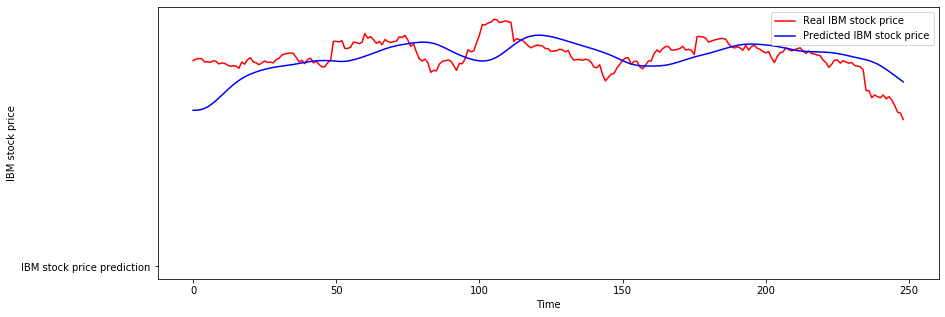

In [31]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real IBM stock price')
plt.plot(y_pred, color = 'blue', label = 'Predicted IBM stock price')
plt.plot('IBM stock price prediction')
plt.xlabel('Time')
plt.ylabel('IBM stock price')
plt.legend()
plt.show()